<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_03/class_003_image_processing_smart_trash_bin_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import random
import zipfile
from matplotlib import pyplot as plt
import skimage.feature
from string import digits
import seaborn as sns
import skimage

In [2]:
!gdown 1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX

Downloading...
From: https://drive.google.com/uc?id=1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX
To: /content/trash_nov_22_2018.zip
100% 42.8M/42.8M [00:00<00:00, 214MB/s]


In [3]:
FILE='trash_nov_22_2018.zip'

In [4]:
archive = zipfile.ZipFile('trash_nov_22_2018.zip', 'r')
archive.extractall()

In [5]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [6]:
Img_Size = 40
ref = 'jpg'
notref = 'met'

In [7]:
X= []  
Y =[]
n = len(img_name)
i = 0
for i in range(n):
  name = img_name[i]
  if(ref in name):
    Y.append(name)
    X.append(cv2.imread(name,0))
m = len(Y)
print(n,m)

2527 2527


In [8]:
g = skimage.feature.greycomatrix(X[0], [1, 2], [0, np.pi/2], levels=255,normed=True, symmetric=True)
glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
glcm =[]
# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb

for x in glcm_names:
  prop = skimage.feature.greycoprops(g, x)
  glcm.append(np.max(prop))


print(glcm)

[76.67184943553663, 3.8348893570026195, 0.48371336250089464, 0.041509031676850994, 0.9899797711903227, 0.0017229997107498193]


In [9]:
m = skimage.exposure.rescale_intensity(X[1000], in_range='image', out_range='dtype')
g = skimage.feature.greycomatrix(m, [1, 2], [0, np.pi/2], levels=256,normed=True, symmetric=True)
glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
glcm =[]
# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb

for x in glcm_names:
  prop = skimage.feature.greycoprops(g, x)
  glcm.append(np.max(prop))


print(glcm)

[370.0416240592274, 7.213214869281038, 0.5907514116474932, 0.07141249134554789, 0.982188674848156, 0.005099743920177952]


In [10]:
np.max(X[3])

255

In [11]:

glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb
features =[]
for i in range(len(img_name)):
  glcm =[]
  m = skimage.exposure.rescale_intensity(X[i], in_range='image', out_range='dtype')
  g = skimage.feature.greycomatrix(m, [1, 2], [0, np.pi/2], levels=256,normed=True, symmetric=True)
  for x in glcm_names:
    prop = skimage.feature.greycoprops(g, x)
    glcm.append(np.max(prop))
  features.append(glcm)

df = pd.DataFrame(features,columns=glcm_names)

In [12]:
df.head()

,contrast,dissimilarity,homogeneity,energy,correlation,ASM
0,100.285841,4.381309,0.461713,0.041509,0.989934,0.001723
1,100.720787,6.039139,0.356470,0.035720,0.997310,0.001276
2,341.852161,6.814918,0.487461,0.040566,0.980984,0.001646
3,374.947181,6.263133,0.644212,0.067136,0.977153,0.004507
4,47.916999,4.853743,0.351147,0.032939,0.996115,0.001085


In [13]:
df.shape

(2527, 6)

In [14]:
n =len(img_name)
tipos = []
selected = 'find'
for x in img_name:
  result =''.join([i for i in x[:-4] if not i.isdigit()])
  if(result != selected):
    selected = result
    tipos.append(selected)


In [15]:
tipos

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [16]:
label =[]
for name in img_name:
  for idx, x in enumerate(tipos):
    if(x in name):
      label.append(idx)

In [17]:
len(label),len(img_name)

(2527, 2527)

In [18]:
df['target']=label

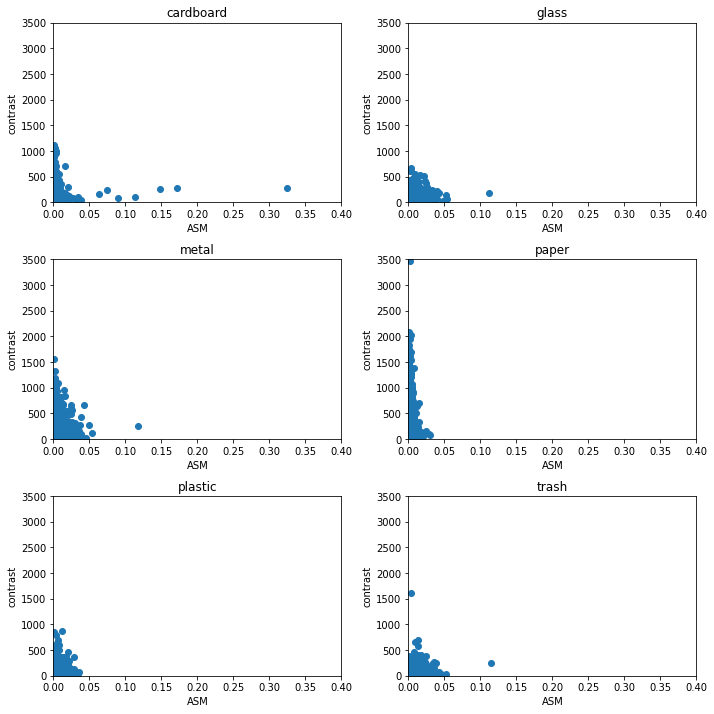

In [19]:
plt.figure(figsize=(10, 10))
tx='ASM'
ty='contrast'
for i in range(6): 
  ax = plt.subplot(3, 2, i + 1)
  df_plot= df[(df["target"] == i)]
  plt.scatter(df_plot[tx],df_plot[ty])
  plt.title(tipos[i])
  plt.ylim([0,3500])
  plt.xlim([0,0.4])
  plt.xlabel(tx)
  plt.ylabel(ty)
  plt.tight_layout(pad=1.0)

In [20]:
for i in range(6): 
  df_plot= df[(df["target"] == i)]
  n= df_plot.shape[0]
  print(tipos[i],n)

cardboard 403
glass 501
metal 410
paper 594
plastic 482
trash 137


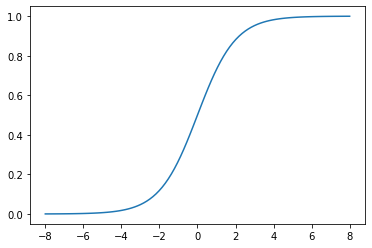

In [21]:
# sigmoid function
# 100 linearly spaced numbers
x = np.linspace(-8,8,100)
# the function, which is y = 1/(1+exp(-x)) here
y = 1.0/(1.0+np.exp(-x))
plt.plot(x,y)

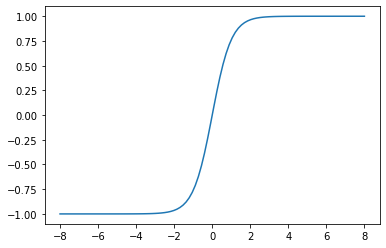

In [22]:
# hyperbolic tangent function
# 100 linearly spaced numbers
x = np.linspace(-8,8,100)
# the function, which is y = 1/(1+exp(-x)) here
y = (1.0-np.exp(-2*x))/(1.0+np.exp(-2*x))
plt.plot(x,y)

In [ ]:
# check this site
# https://developer.ibm.com/articles/cc-cognitive-neural-networks-deep-dive/